# Linear Regression Assignment
### Parikshit Prasai

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the csv file into dataframe
car_prices = pd.read_csv('./CarPrice_Assignment.csv')

# We'll keep an original copy of the dataframe
# so that we can perform EDA on it after we've
# encoded the other dataframe and created dummies
car_prices_unaltered = car_prices.copy()

In [2]:
# let's see what it looks like
car_prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

*no missing value*

## Data Understanding & Cleaning

In [4]:
# we will get rid of the car_ID column as it adds no information to the dataset
car_prices.drop('car_ID', 1, inplace = True)

In [5]:
car_prices['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [6]:
car_prices['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

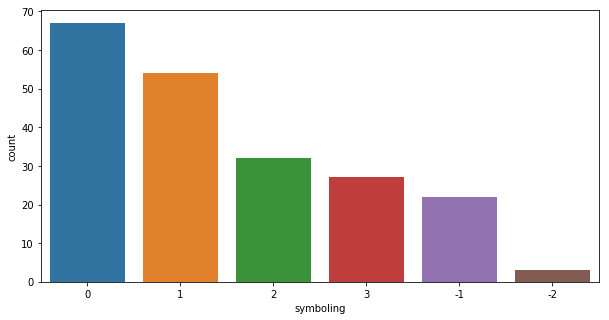

In [7]:
plt.figure(figsize = (10, 5))
sns.countplot(car_prices['symboling'], order = car_prices['symboling'].value_counts().index)

- So most cars are not too risky and not too safe with risk rating of 0  
- Very few have rating as very safe

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

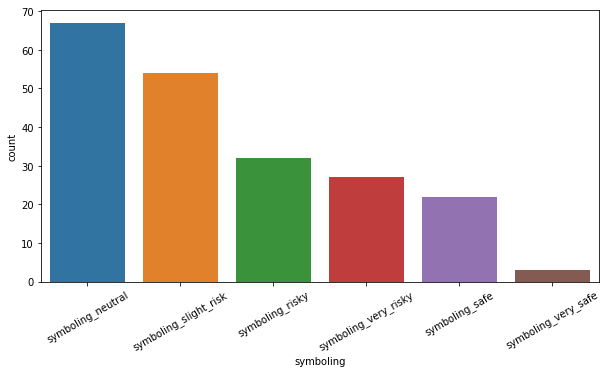

In [8]:
# I want to create dummies for symboling variable.
# However columns name of -2 through 3 are not very good.
# I'll change the encodings with some relevant strings

switch_dict = {
    -2: 'symboling_very_safe',
    -1: 'symboling_safe',
    0 : 'symboling_neutral',
    1 : 'symboling_slight_risk',
    2 : 'symboling_risky',
    3 : 'symboling_very_risky',
}    
    
car_prices['symboling'] = car_prices['symboling'].apply(lambda x: switch_dict.get(x, None))

plt.figure(figsize = (10, 5))
sns.countplot(car_prices['symboling'], order = car_prices['symboling'].value_counts().index)
plt.xticks(rotation = 30)

*Looks Good*

In [9]:
symboling_dummies = pd.get_dummies(car_prices['symboling'], drop_first = True)
symboling_dummies.head()

,symboling_risky,symboling_safe,symboling_slight_risk,symboling_very_risky,symboling_very_safe
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [10]:
car_prices.drop('symboling', 1, inplace = True)
car_prices = pd.concat([car_prices, symboling_dummies], axis = 1)
car_prices.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'symboling_risky',
       'symboling_safe', 'symboling_slight_risk', 'symboling_very_risky',
       'symboling_very_safe'],
      dtype='object')

In [11]:
car_prices['companyName'] = car_prices['CarName'].apply(
    lambda x: x.split(' ')[0]
)

In [12]:
car_prices['companyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

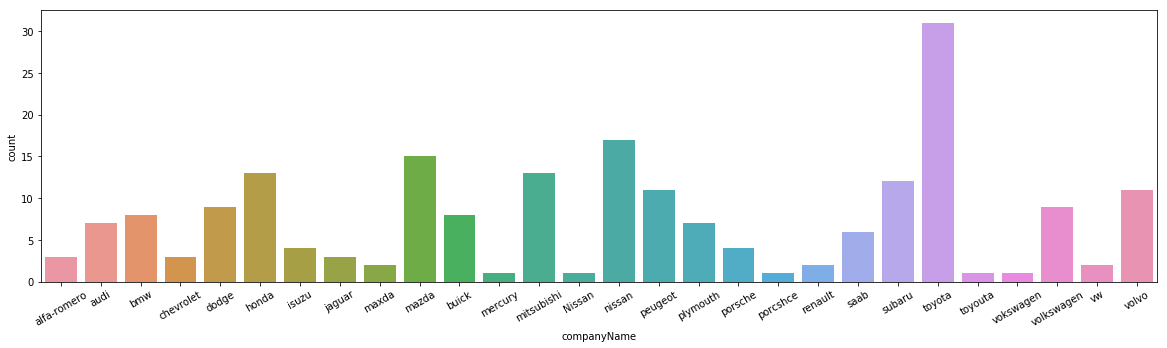

In [13]:
plt.figure(figsize = (20, 5))
sns.countplot(car_prices['companyName'])
plt.xticks(rotation = 30)

*A lot of Toyotas*  
  
I can see few potential typos in the *companyName*  
- maxda for mazda
- Nissan and nissan
- porcshce for porsche
- toyouta for toyota
- vokswagen and vw for volkswagen
  
Lets clean these typos

In [14]:
car_prices.loc[car_prices['companyName'] == 'maxda', 'companyName'] = 'mazda'
car_prices.loc[car_prices['companyName'] == 'Nissan', 'companyName'] = 'nissan'
car_prices.loc[car_prices['companyName'] == 'porcshce', 'companyName'] = 'porsche'
car_prices.loc[car_prices['companyName'] == 'toyouta', 'companyName'] = 'toyota'
car_prices.loc[car_prices['companyName'] == 'vokswagen', 'companyName'] = 'volkswagen'
car_prices.loc[car_prices['companyName'] == 'vw', 'companyName'] = 'volkswagen'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

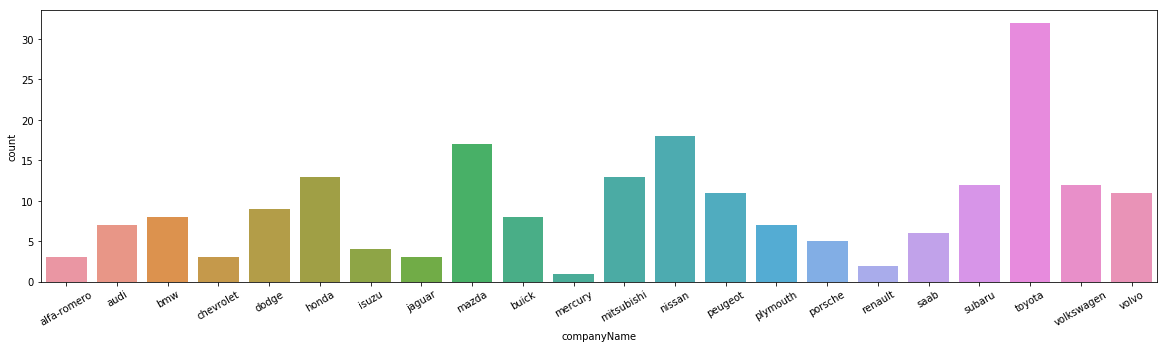

In [15]:
plt.figure(figsize = (20, 5))
sns.countplot(car_prices['companyName'])
plt.xticks(rotation = 30)

*Typos on companyName resolved by collapsing all duplicates into a single value.*  
Since carName is not significant predictor as stated in the assignment page, it will be dropped

In [16]:
car_prices.drop('CarName', 1, inplace = True)

In [17]:
car_company_dummies = pd.get_dummies(car_prices['companyName'], drop_first = True)
car_company_dummies.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
car_prices.drop('companyName', 1, inplace = True)
car_prices = pd.concat([car_prices, car_company_dummies], axis = 1)
car_prices.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'symboling_risky',
       'symboling_safe', 'symboling_slight_risk', 'symboling_very_risky',
       'symboling_very_safe', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [19]:
car_prices['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

*fueltype* variable will be mapped as follows  
- gas: 0
- diesel: 1

In [20]:
car_prices['fueltype'] = car_prices['fueltype'].apply(
    lambda x: 0 if x == 'gas' else 1
)

In [21]:
car_prices['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

*aspiration* variable will be mapped as follows
- std: 0
- turbo: 1

In [22]:
car_prices['aspiration'] = car_prices['aspiration'].apply(
    lambda x: 0 if x == 'std' else 1
)

In [23]:
car_prices['doornumber'].unique()

array(['two', 'four'], dtype=object)

*doornumber* variable will be mapped as follows
- two: 0
- four: 1

In [24]:
car_prices['doornumber'] = car_prices['doornumber'].apply(
    lambda x: 0 if x == 'two' else 1
)

In [25]:
car_prices['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [26]:
carbody_dummy = pd.get_dummies(car_prices['carbody'], drop_first = True)
carbody_dummy.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [27]:
car_prices.drop('carbody', 1, inplace = True)
car_prices = pd.concat([car_prices, carbody_dummy], axis = 1)
car_prices.columns

Index(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'symboling_risky', 'symboling_safe',
       'symboling_slight_risk', 'symboling_very_risky', 'symboling_very_safe',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [28]:
car_prices['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
drivewheel_dummy = pd.get_dummies(car_prices['drivewheel'], drop_first = True)
drivewheel_dummy.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [30]:
car_prices.drop('drivewheel', 1, inplace = True)
car_prices = pd.concat([car_prices, drivewheel_dummy], axis = 1)
car_prices.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'symboling_risky', 'symboling_safe', 'symboling_slight_risk',
       'symboling_very_risky', 'symboling_very_safe', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd'],
      dtype='object')

In [31]:
car_prices['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

*enginelocation* variable will be mapped as follows
- front: 0
- rear: 1

In [32]:
car_prices['enginelocation'] = car_prices['enginelocation'].apply(
    lambda x: 0 if x == 'front' else 1
)

In [33]:
enginetype_dummies = pd.get_dummies(car_prices['enginetype'], drop_first = True)
enginetype_dummies.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [34]:
car_prices.drop('enginetype', 1, inplace = True)
car_prices = pd.concat([car_prices, enginetype_dummies], axis = 1)
car_prices.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'symboling_risky', 'symboling_safe', 'symboling_slight_risk',
       'symboling_very_risky', 'symboling_very_safe', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor'],
      dtype='object')

In [35]:
cylindernumber_dummies = pd.get_dummies(car_prices['cylindernumber'], drop_first = True)
cylindernumber_dummies.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [36]:
car_prices.drop('cylindernumber', 1, inplace = True)
car_prices = pd.concat([car_prices, cylindernumber_dummies], axis = 1)
car_prices.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'symboling_risky',
       'symboling_safe', 'symboling_slight_risk', 'symboling_very_risky',
       'symboling_very_safe', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two'],
      dtype='object')

In [37]:
fuelsystem_dummies = pd.get_dummies(car_prices['fuelsystem'], drop_first = True)
fuelsystem_dummies.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [38]:
car_prices.drop('fuelsystem', 1, inplace = True)
car_prices = pd.concat([car_prices, fuelsystem_dummies], axis = 1)
car_prices.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'symboling_risky', 'symboling_safe',
       'symboling_slight_risk', 'symboling_very_risky', 'symboling_very_safe',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

In [39]:
car_prices['wheelbase'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

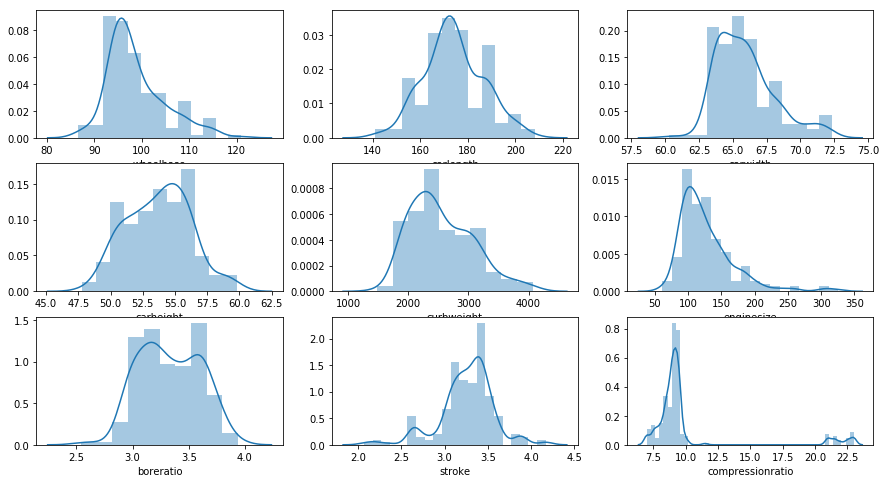

In [40]:
_, axes = plt.subplots(3, 3, figsize = (15, 8))

sns.distplot(car_prices['wheelbase'], ax = axes[0, 0])
sns.distplot(car_prices['carlength'], ax = axes[0, 1])
sns.distplot(car_prices['carwidth'], ax = axes[0, 2])
sns.distplot(car_prices['carheight'], ax = axes[1, 0])
sns.distplot(car_prices['curbweight'], ax = axes[1, 1])
sns.distplot(car_prices['enginesize'], ax = axes[1, 2])
sns.distplot(car_prices['boreratio'], ax = axes[2, 0])
sns.distplot(car_prices['stroke'], ax = axes[2, 1])
sns.distplot(car_prices['compressionratio'], ax = axes[2, 2])

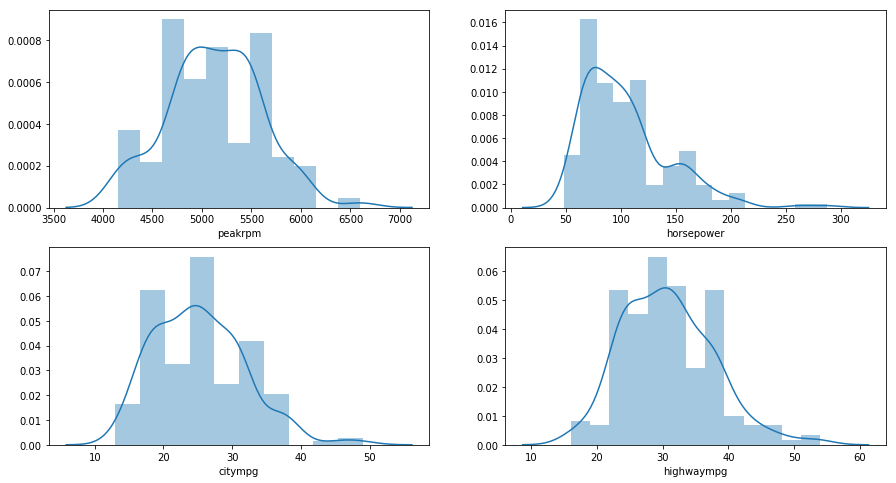

In [41]:
_, axes = plt.subplots(2, 2, figsize = (15, 8))

sns.distplot(car_prices['peakrpm'], ax = axes[0, 0])
sns.distplot(car_prices['horsepower'], ax = axes[0, 1])
sns.distplot(car_prices['citympg'], ax = axes[1, 0])
sns.distplot(car_prices['highwaympg'], ax = axes[1, 1])

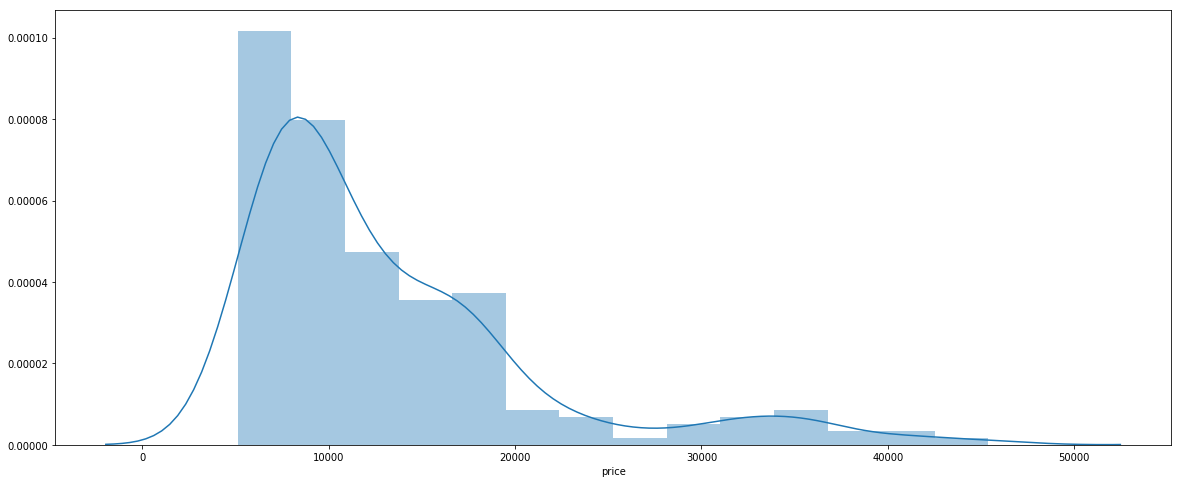

In [42]:
plt.figure(figsize = (20, 8))

sns.distplot(car_prices['price'])

### All these 14 numeric variables will be scaled after correlation analysis

### Correlation analysis

In [43]:
# defining a shorthand for easier code
data = car_prices_unaltered
data.drop('car_ID', 1, inplace = True)

data['companyName'] = data['CarName'].apply(
    lambda x: x.split(' ')[0]
)

data.loc[data['companyName'] == 'maxda', 'companyName'] = 'mazda'
data.loc[data['companyName'] == 'Nissan', 'companyName'] = 'nissan'
data.loc[data['companyName'] == 'porcshce', 'companyName'] = 'porsche'
data.loc[data['companyName'] == 'toyouta', 'companyName'] = 'toyota'
data.loc[data['companyName'] == 'vokswagen', 'companyName'] = 'volkswagen'
data.loc[data['companyName'] == 'vw', 'companyName'] = 'volkswagen'

data.drop('CarName', 1, inplace = True)

In [44]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'companyName'],
      dtype='object')

In [45]:
data_numeric = data[[
    'wheelbase', 
    'carlength', 
    'carwidth', 
    'carheight', 
    'curbweight', 
    'enginesize', 
    'boreratio', 
    'stroke', 
    'compressionratio', 
    'horsepower', 
    'peakrpm', 
    'citympg', 
    'highwaympg', 
    'price'
]]

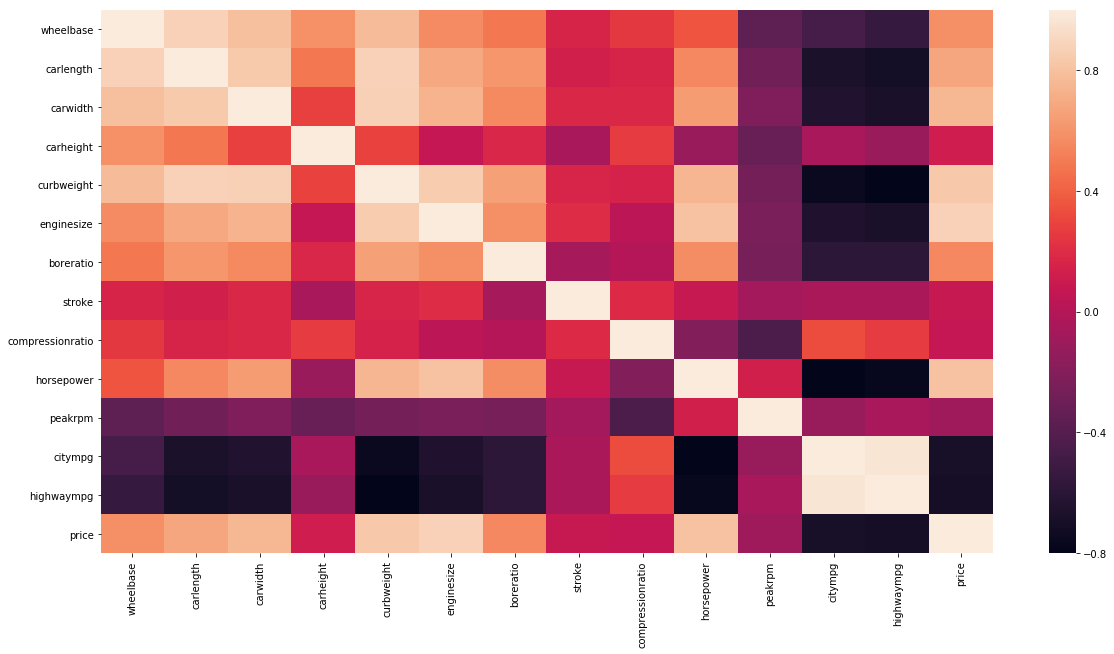

In [46]:
plt.figure(figsize = (20,10))
sns.heatmap(data_numeric.corr())

I would like to have a dictionary with high correlation values

In [47]:
data_numeric.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


In [48]:
corr = data_numeric.corr().abs().unstack()
corr = corr.sort_values(ascending = False)
corr = pd.DataFrame(corr.reset_index())

corr

,level_0,level_1,0
0,price,price,1.000000
1,highwaympg,highwaympg,1.000000
2,carlength,carlength,1.000000
3,carwidth,carwidth,1.000000
4,carheight,carheight,1.000000
5,curbweight,curbweight,1.000000
6,enginesize,enginesize,1.000000
7,boreratio,boreratio,1.000000
8,stroke,stroke,1.000000
9,compressionratio,compressionratio,1.000000


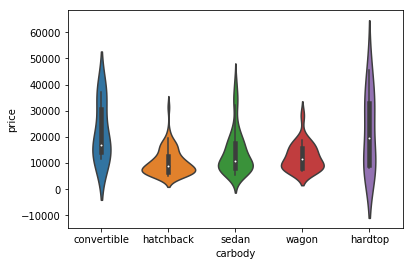

In [49]:
sns.violinplot(y = 'price', x = 'carbody', data = car_prices_unaltered)

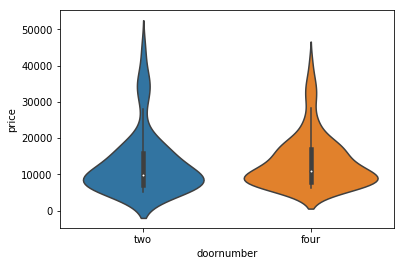

In [50]:
sns.violinplot(y = 'price', x = 'doornumber', data = car_prices_unaltered)

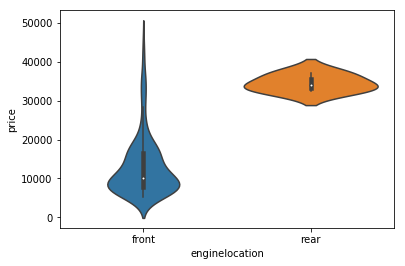

In [51]:
sns.violinplot(y = 'price', x = 'enginelocation', data = car_prices_unaltered)

Vehicles with engine to the rear of it are clearly more expensive

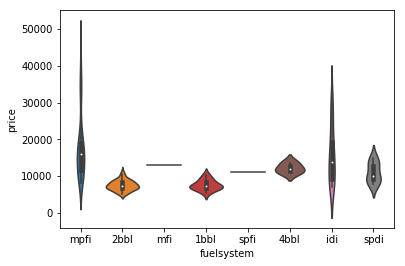

In [52]:
sns.violinplot(y = 'price', x = 'fuelsystem', data = car_prices_unaltered)

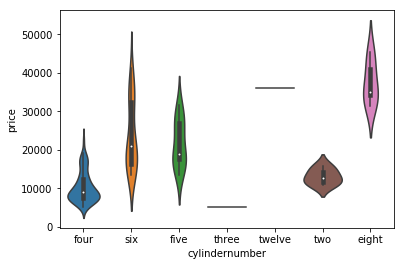

In [53]:
sns.violinplot(y = 'price', x = 'cylindernumber', data = car_prices_unaltered)

Cars with higher number of cylinders are generally more expensive. Cars with two cylinders are more expensive than ones with four cylinder though.

### Train-test split, scaling and model fitting

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train, test = train_test_split(car_prices, train_size = 0.7, test_size = 0.3, random_state = 100)

numeric_vars = [
    'wheelbase', 
    'carlength', 
    'carwidth', 
    'carheight', 
    'curbweight', 
    'enginesize', 
    'boreratio', 
    'stroke', 
    'compressionratio', 
    'horsepower', 
    'peakrpm', 
    'citympg', 
    'highwaympg', 
    'price'
]

scaler = MinMaxScaler()
train[numeric_vars] = scaler.fit_transform(train[numeric_vars])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [55]:
train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [56]:
y_train = train.pop('price')
x_train = train

#### RFE (Recusrive Feature Elimination)  
We will try getting top 20 features using RFE

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

lrModel = LinearRegression()
lrModel.fit(x_train, y_train)

rfe = RFE(lrModel, 20)
rfe = rfe.fit(x_train, y_train)

# list(zip(x_train.columns,rfe.support_,rfe.ranking_))
rfe_cols = x_train.columns[rfe.support_]
rfe_cols

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'highwaympg', 'symboling_very_safe', 'bmw',
       'peugeot', 'porsche', 'volvo', 'l', 'rotor', 'five', 'four', 'three',
       'twelve', 'two'],
      dtype='object')

According to RFE, abovementioned are the 20 top predictors for the dataset

#### Lets see detailed statistics for model applied on RFE

In [58]:
x_train_pruned = x_train[rfe_cols]

x_train_pruned = sm.add_constant(x_train_pruned)

lrModel = sm.OLS(y_train, x_train_pruned).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     130.1
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           1.96e-71
Time:                        20:53:54   Log-Likelihood:                 230.73
No. Observations:                 143   AIC:                            -423.5
Df Residuals:                     124   BIC:                            -367.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3909    

In [59]:
vif = pd.DataFrame()
x = x_train_pruned
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

E:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
20,two,inf
11,peugeot,inf
18,three,inf
15,rotor,inf
14,l,inf
0,const,147.488058
4,enginesize,31.371412
3,curbweight,15.368083
17,four,14.221387
2,carwidth,6.538661


In [60]:
x_train2 = x_train_pruned.drop('two', 1)

x_train2 = sm.add_constant(x_train2)

lrModel = sm.OLS(y_train, x_train2).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     130.1
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           1.96e-71
Time:                        20:53:55   Log-Likelihood:                 230.73
No. Observations:                 143   AIC:                            -423.5
Df Residuals:                     124   BIC:                            -367.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3909    

In [61]:
vif = pd.DataFrame()
x = x_train2
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

E:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
14,l,inf
18,three,inf
11,peugeot,inf
0,const,147.488058
4,enginesize,31.371412
3,curbweight,15.368083
17,four,14.221387
2,carwidth,6.538661
5,boreratio,6.409374
15,rotor,6.088909


In [62]:
x_train3 = x_train2.drop('l', 1)

x_train3 = sm.add_constant(x_train3)

lrModel = sm.OLS(y_train, x_train3).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     130.1
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           1.96e-71
Time:                        20:53:55   Log-Likelihood:                 230.73
No. Observations:                 143   AIC:                            -423.5
Df Residuals:                     124   BIC:                            -367.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3909    

In [63]:
vif = pd.DataFrame()
x = x_train3
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,147.488058
4,enginesize,31.371412
3,curbweight,15.368083
16,four,14.221387
2,carwidth,6.538661
5,boreratio,6.409374
14,rotor,6.088909
8,highwaympg,4.666583
15,five,3.356609
18,twelve,3.170851


Lets remove enginesize and see what happens...

In [64]:
x_train4 = x_train3.drop('enginesize', 1)

x_train4 = sm.add_constant(x_train4)

lrModel = sm.OLS(y_train, x_train4).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     79.56
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           1.63e-58
Time:                        20:53:55   Log-Likelihood:                 193.54
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     125   BIC:                            -297.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2804    

In [65]:
vif = pd.DataFrame()
x = x_train4
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,139.779596
3,curbweight,12.237409
2,carwidth,6.416768
15,four,5.635344
7,highwaympg,4.651192
4,boreratio,3.839149
11,porsche,2.167176
6,peakrpm,1.930998
13,rotor,1.833084
10,peugeot,1.774563


Well... things went pretty downhill...  
Let's see how things correlate

In [66]:
corr = x_train3.corr().abs().unstack()
corr = corr.sort_values(ascending = False)
corr = pd.DataFrame(corr.reset_index())

corr

,level_0,level_1,0
0,twelve,twelve,1.000000
1,symboling_very_safe,symboling_very_safe,1.000000
2,five,five,1.000000
3,rotor,rotor,1.000000
4,volvo,volvo,1.000000
5,porsche,porsche,1.000000
6,peugeot,peugeot,1.000000
7,bmw,bmw,1.000000
8,highwaympg,highwaympg,1.000000
9,three,three,1.000000


Looks like the variable *curbweight* is highly correlateed with a lot of other variables. We will start by removing it.

In [67]:
x_train4 = x_train3.drop('curbweight', 1)
x_train4 = sm.add_constant(x_train4)

lrModel = sm.OLS(y_train, x_train4).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           1.48e-67
Time:                        20:53:55   Log-Likelihood:                 217.58
No. Observations:                 143   AIC:                            -399.2
Df Residuals:                     125   BIC:                            -345.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2993    

In [68]:
vif = pd.DataFrame()
x = x_train4
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,129.578720
3,enginesize,24.980656
15,four,14.135632
4,boreratio,6.376917
13,rotor,5.890372
2,carwidth,5.845778
7,highwaympg,3.638774
14,five,3.284964
17,twelve,2.972284
5,stroke,2.498874


In [69]:
x_train5 = x_train4.drop('four', 1)
x_train5 = sm.add_constant(x_train5)

lrModel = sm.OLS(y_train, x_train5).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     87.79
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           3.14e-60
Time:                        20:53:55   Log-Likelihood:                 195.50
No. Observations:                 143   AIC:                            -357.0
Df Residuals:                     126   BIC:                            -306.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1260    

In [70]:
vif = pd.DataFrame()
x = x_train5
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,99.840679
3,enginesize,7.605797
2,carwidth,5.841051
7,highwaympg,3.615907
4,boreratio,2.828239
11,porsche,2.127092
6,peakrpm,1.801857
1,enginelocation,1.800046
12,volvo,1.790088
16,twelve,1.737681


We seem to have solved the multicollinearity issue. Now lets focus on the model fit summary.  
As can be seen, *highwaympg* is probably not required for a good fit. Let's remove it.

In [71]:
x_train6 = x_train5.drop('highwaympg', 1)
x_train6 = sm.add_constant(x_train6)

lrModel = sm.OLS(y_train, x_train6).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     94.38
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           3.20e-61
Time:                        20:53:56   Log-Likelihood:                 195.49
No. Observations:                 143   AIC:                            -359.0
Df Residuals:                     127   BIC:                            -311.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1207    

Let's now get rid of *peugeot*

In [72]:
x_train7 = x_train6.drop('peugeot', 1)
x_train7 = sm.add_constant(x_train7)

lrModel = sm.OLS(y_train, x_train7).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           3.18e-62
Time:                        20:53:56   Log-Likelihood:                 195.46
No. Observations:                 143   AIC:                            -360.9
Df Residuals:                     128   BIC:                            -316.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1191    

In [73]:
vif = pd.DataFrame()
x = x_train7
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,42.798749
3,enginesize,5.085682
2,carwidth,4.593711
4,boreratio,2.593176
9,porsche,1.892274
1,enginelocation,1.721522
10,volvo,1.687906
14,twelve,1.637107
7,symboling_very_safe,1.569069
5,stroke,1.518453


*peakrpm* goes next

In [74]:
x_train8 = x_train7.drop('peakrpm', 1)
x_train8 = sm.add_constant(x_train8)

lrModel = sm.OLS(y_train, x_train8).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           4.94e-63
Time:                        20:53:56   Log-Likelihood:                 194.89
No. Observations:                 143   AIC:                            -361.8
Df Residuals:                     129   BIC:                            -320.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0984    

In [75]:
x_train9 = x_train8.drop('symboling_very_safe', 1)
x_train9 = sm.add_constant(x_train9)

lrModel = sm.OLS(y_train, x_train9).fit()
print(lrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     116.3
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           2.40e-63
Time:                        20:53:56   Log-Likelihood:                 193.01
No. Observations:                 143   AIC:                            -360.0
Df Residuals:                     130   BIC:                            -321.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0949      0.029     -3.

#### Close enough ...
### Residual analysis on train data

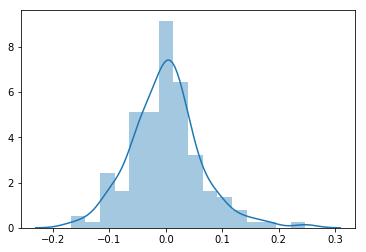

In [76]:
y_train_predicted = lrModel.predict(x_train9)
error = y_train - y_train_predicted

sns.distplot(error)

#### Error terms tend to be normally distributed around 0 which satisfies the assumption of linear regression

### Predicting on test data set

In [79]:
# we will need to apply the scaling to test dataset as well
numeric_vars

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [81]:
test[numeric_vars] = scaler.transform(test[numeric_vars])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [84]:
y_test = test.pop('price')
x_test = test

In [104]:
cols = x_train9.columns
cols = cols.drop('const')

x_test_pruned = x_test[cols]
x_test_pruned = sm.add_constant(x_test_pruned)

In [105]:
prediction = lrModel.predict(x_test_pruned)

## Model Evaluation

Text(0,0.5,'prediction')

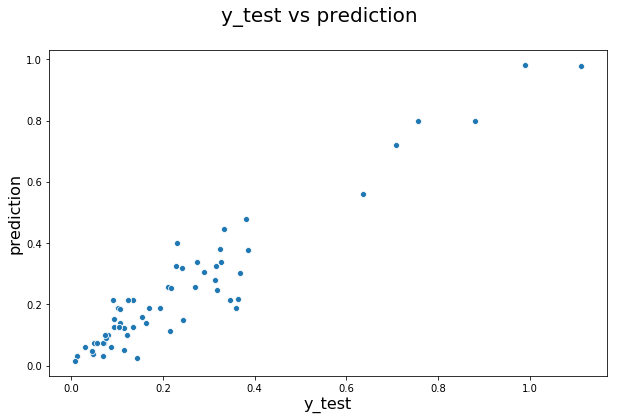

In [112]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = prediction)
plt.suptitle('y_test vs prediction', fontsize=20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('prediction', fontsize=16)

That's a pretty good model!

In [109]:
from sklearn.metrics import r2_score

r2_score(y_test, prediction)

0.9145673753626441